In [232]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")
meeting_data_path = (
    "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/meetings/"
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [233]:
ratinfo = dj.create_virtual_module("intfo", "ratinfo")
rat_names = (ratinfo.Rats & {"israt = 1"} & {"experimenter": "JessB"}).fetch("ratname")
date_min, date_max = dju.return_date_window(n_days_back=365)

[2024-04-25 14:43:05,506][WARNING]: MySQL server has gone away. Reconnecting to the server.


In [234]:
trials_df = create_trials_df_from_dj(
    animal_ids=rat_names.tolist(), date_min=date_min, date_max=date_max
)

Not all variables are the same length. Cannot create proper DataFrame
result: 9
hits: 9
violations: 9
temperror: 9
hit_rate: 8
error_rate: 8
violation_rate: 8
temp_error_rate: 8
n_lpokes: 8
n_cpokes: 8
n_rpokes: 8
trial_dur: 8
trial_start: 8
valid_early_spoke: 8
first_spoke: 8
first_lpoke: 8
first_rpoke: 8
n_settling_ins: 8
avg_settling_in: 8
cpoke_dur: 8
stage: 8
curriculum: 8
sides: 9
SMA_set: 8
is_match: 9
sa: 8
sb: 8
stimuli_on: 8
settling_in_dur: 8
legal_cbreak_dur: 8
pre_dur: 8
adj_pre_dur: 8
stimulus_dur: 8
delay_dur: 8
post_dur: 8
sb_extra_dur: 8
viol_off_dur: 8
pre_go_dur: 8
inter_trial_dur: 8
go_type: 8
go_dur: 8
give_type_set: 8
give_type_imp: 8
give_frac: 8
give_delay_dur: 8
give_xtra_light_delay_dur: 8
give_use: 9
replay_on: 8
timeouts: 9
water_delivered: 9
give_water_not_drunk: 9
crash_hist: 8
was_block_swtich: 8
volume_multiplier: 8
l_water_vol: 8
r_water_vol: 8
ab_l_prob: 8
ab_r_prob: 8
ab_beta: 8
ab_tau: 8
exp_del_tau: 8
exp_del_min: 8
exp_del_max: 8
session 927302 df 

In [235]:
animals2 = [
    "C214",
    "C215",
    "C220",
    "C221",
    "C222",
    "C223",
]

trials_df2 = create_trials_df_from_dj(
    animal_ids=animals2, date_min="2023-08-18", date_max=date_max
)

trials_df = pd.concat([trials_df, trials_df2], ignore_index=True)

fetched 208 sessions for C214 between 2023-08-18 and 2024-04-15
fetched 218 sessions for C215 between 2023-08-18 and 2024-04-24
Not all variables are the same length. Cannot create proper DataFrame
result: 7
hits: 7
violations: 7
temperror: 7
hit_rate: 6
error_rate: 6
violation_rate: 6
temp_error_rate: 6
n_lpokes: 6
n_cpokes: 6
n_rpokes: 6
trial_dur: 6
trial_start: 6
valid_early_spoke: 6
first_spoke: 6
first_lpoke: 6
first_rpoke: 6
n_settling_ins: 6
avg_settling_in: 6
cpoke_dur: 6
n_incorr_spokes_during_give_del: 6
stage: 6
curriculum: 6
sides: 7
SMA_set: 6
is_match: 7
sa: 6
sb: 6
stimuli_on: 6
settling_in_dur: 6
legal_cbreak_dur: 6
pre_dur: 6
adj_pre_dur: 6
stimulus_dur: 6
delay_dur: 6
post_dur: 6
sb_extra_dur: 6
viol_off_dur: 6
pre_go_dur: 6
inter_trial_dur: 6
go_type: 6
go_dur: 6
give_type_set: 6
give_type_imp: 6
give_frac: 6
give_delay_dur: 6
give_xtra_light_delay_dur: 6
give_use: 7
replay_on: 6
timeouts: 7
water_delivered: 7
give_water_not_drunk: 7
crash_hist: 6
pro_stim_set: 6
an

In [236]:
trials_df = pd.concat([trials_df, trials_df2], ignore_index=True)
trials_df.to_csv(meeting_data_path + "2024_04_29_JC_meeting.csv", index=False)

In [237]:
trials_df = pd.read_csv(meeting_data_path + "2024_04_29_JC_meeting.csv")

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_34678/578236727.py:1: DtypeWarning: Columns (54,69,70,71,74,82,87,89,95) have mixed types. Specify dtype option on import or set low_memory=False.
  trials_df = pd.read_csv(meeting_data_path + "2024_04_29_JC_meeting.csv")


## Stage Plot

In [24]:
trials_df["date"] = pd.to_datetime(trials_df["date"], format="mixed")
trials_df["start_date"] = trials_df.groupby("animal_id")["date"].transform(
    lambda x: (x - x.min()).dt.days
)

In [26]:
plot_stage_df = trials_df.query("stage <12").copy()

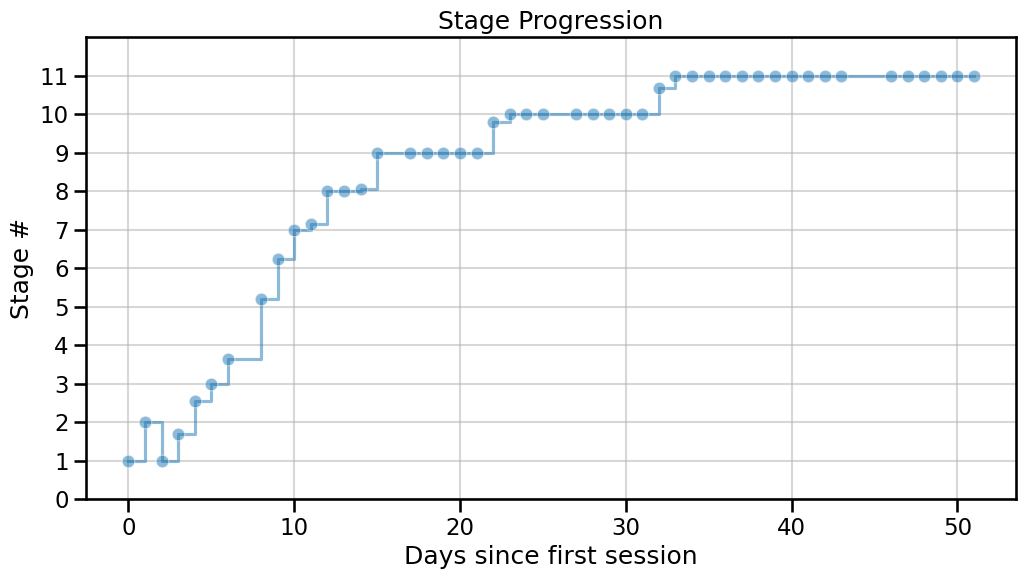

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
example_animal = "R035"
plot_stage(
    plot_stage_df.query("animal_id == @example_animal"),
    ax=ax,
    group="start_date",
    aesthetics=False,
    alpha=0.5,
    label=None,
)

max_stage = int(plot_stage_df.stage.max())
ax.grid(alpha=0.5)
_ = ax.set(
    ylabel="Stage #",
    title="Stage Progression",
    ylim=(0, max_stage + 1),
    yticks=range(max_stage + 1),
    xlabel="Days since first session",
)

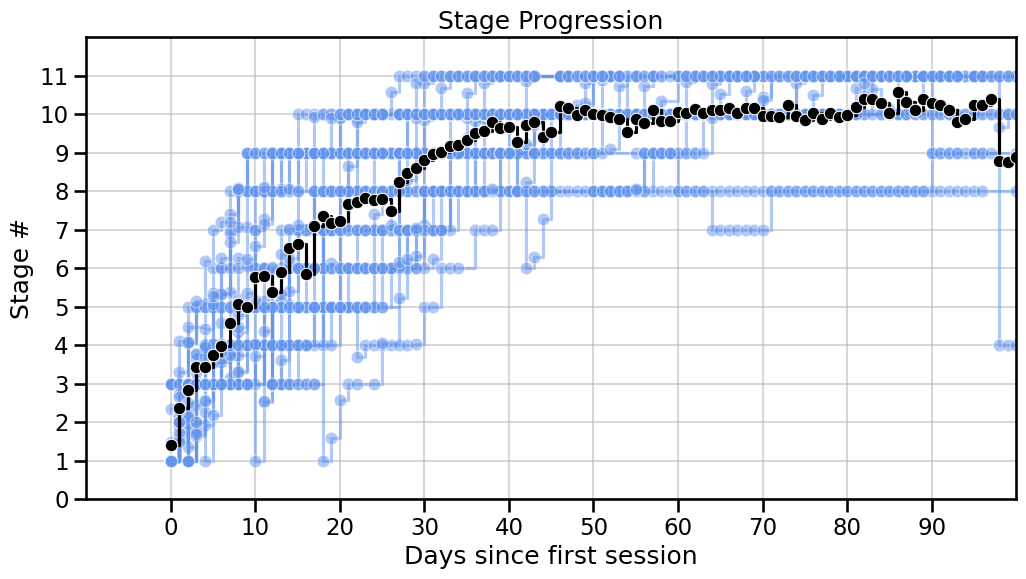

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
for animal_id, sub_df in plot_stage_df.groupby("animal_id"):
    plot_stage(
        sub_df,
        ax=ax,
        group="start_date",
        aesthetics=False,
        color="cornflowerblue",
        alpha=0.5,
        label=None,
    )

plot_stage(
    plot_stage_df,
    ax=ax,
    group="start_date",
    aesthetics=False,
    color="black",
)

max_stage = int(sub_df.stage.max())
ax.grid(alpha=0.5)
_ = ax.set(
    ylabel="Stage #",
    title="Stage Progression",
    ylim=(0, max_stage + 1),
    yticks=range(max_stage + 1),
    xlabel="Days since first session",
    xlim=(-10, 100),
    xticks=np.arange(stop=100, step=10),
)

## Number of days in stage 11 and performanc is below 80%

In [90]:
stage_12_animals = trials_df.query("stage >= 12").animal_id.unique()
stage_11_df = trials_df.query(
    "animal_id in @stage_12_animals and stage == 10 or stage == 11"
).copy()

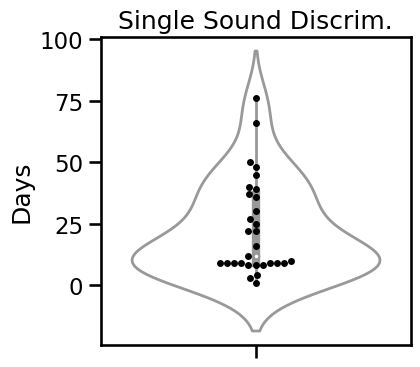

In [128]:
grouped_df = stage_11_df.groupby(["animal_id", "date"]).hits.mean().reset_index()
learning_days_stage_11 = (
    grouped_df.query("hits < 0.80").groupby("animal_id").date.nunique().reset_index()
).rename(columns={"date": "days_to_sound_rule"})

fig, ax = pu.make_fig((4, 4))
sns.swarmplot(data=learning_days_stage_11, y="days_to_sound_rule", color="black")
sns.violinplot(
    data=learning_days_stage_11, y="days_to_sound_rule", color="white", linewidth=2
)

_ = ax.set(ylabel="Days", title="Single Sound Discrim.", ylim=(None, None))

54.0

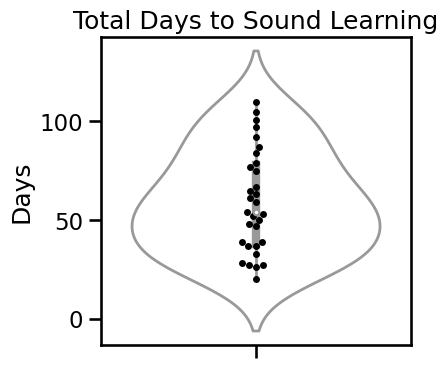

In [139]:
# of the animals that have learned the simple rule, grab the data
# from stages 1-9 to determine how long it takes them to get to
# sound learning stages
pre_rule_learning_df = trials_df.query(
    "animal_id in @stage_12_animals and stage < 10"
).copy()

# get the number of days it takes to get to stage 10
pre_sound_learning = (
    pre_rule_learning_df.groupby("animal_id")
    .date.nunique()
    .reset_index()
    .rename(columns={"date": "days_to_10"})
)

# merge data frames togtether, one column for sound
# rule learning (computed a bove) the other for days
# prior to sound rule stages
merged_df = pre_sound_learning.merge(
    learning_days_stage_11, on="animal_id", how="inner"
)

# add together for visual
merged_df["total_days_to_sound_rule"] = (
    merged_df.days_to_10 + merged_df.days_to_sound_rule
)

# plot
fig, ax = pu.make_fig((4, 4))
sns.swarmplot(data=merged_df, y="total_days_to_sound_rule", color="black")
sns.violinplot(data=merged_df, y="total_days_to_sound_rule", color="white", linewidth=2)

_ = ax.set(ylabel="Days", title="Total Days to Sound Learning", ylim=(None, None))

merged_df["total_days_to_sound_rule"].median()

In [152]:
animal_id = "R014"

df = trials_df.query("animal_id == @animal_id and stage >9").copy()

In [245]:
def plot_perf_over_days_from_trials_df(df, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    sns.lineplot(
        data=df, x="date", y="hits", ax=ax, color="green", label="hits", errorbar=None
    )
    sns.lineplot(
        data=df,
        x="date",
        y="violations",
        ax=ax,
        color="orangered",
        label="viol",
        errorbar=None,
    )

    ax2 = ax.twinx()
    sns.lineplot(
        data=df,
        x="date",
        y="trial",
        estimator="max",
        ax=ax2,
        color="k",
        marker=".",
        label="N trials",
    )
    ax.set(
        ylabel="Performance",
        xlabel="Date",
        title="Overall Performance",
        ylim=(-0.1, 1.1),
    )

    # ax.grid(alpha=0.5)

    return None

In [238]:
FIG_PATH = "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/meetings/2024_04_26_JC/"

In [257]:
import os


def create_curriculum_summary_plots(trials_df, min_stage, save_path):

    # Ensure the save_path directory exists
    os.makedirs(save_path, exist_ok=True)

    trials_df = trials_df.query("stage >= @min_stage").copy()

    # Iterate over each unique animal_id
    for animal_id, animal_df in trials_df.groupby("animal_id"):

        # Setup the figure
        fig, axarr = plt.subplots(4, 2, figsize=(30, 17), sharex=True)
        fig.suptitle(animal_id, fontsize=36, fontweight="bold")

        # Plotting functions
        plot_stage(
            animal_df,
            ax=axarr[0, 0],
            group="date",
            aesthetics=False,
            ylim=(9, 17),
            title="Stage",
        )
        plot_perf_over_days_from_trials_df(animal_df, ax=axarr[0, 1])
        plot_give_info_days(animal_df, ax=axarr[1, 0], aesthetics=False)
        plot_give_use_rate_days(animal_df, ax=axarr[1, 1], aesthetics=False)
        plot_give_delay_dur_days_line(
            animal_df,
            aesthetics=False,
            ax=axarr[1, 1],
            title="Give Delivery & Delay Metrics",
        )
        plot_performance_by_stim_over_days(
            animal_df,
            without_give=False,
            ax=axarr[2, 0],
            aesthetics=False,
            confidence_intervals=False,
            title="Stim Perf Including Give",
        )
        plot_performance_by_stim_over_days(
            animal_df,
            without_give=False,
            ax=axarr[2, 1],
            aesthetics=False,
            confidence_intervals=False,
            title="Stim Perf No Give",
        )
        plot_performance_by_pro_anti_over_days(
            animal_df,
            without_give=False,
            ax=axarr[3, 0],
            confidence_intervals=False,
            xaxis_label=True,
            title="Pro Anti Including Give",
        )
        plot_performance_by_pro_anti_over_days(
            animal_df,
            without_give=True,
            ax=axarr[3, 1],
            confidence_intervals=False,
            xaxis_label=True,
            title="Pro Anti No Give",
        )

        plt.tight_layout()

        # Save the plot to a file
        file_name = f"{animal_id}_Curriculum_History_Stage_{min_stage}.png"
        plt.savefig(os.path.join(save_path, file_name))
        plt.close()

    return None

In [231]:
trials_df.animal_id.unique()

array(['R010', 'R011', 'R012', 'R013', 'R014', 'R015', 'R020', 'R021',
       'R022', 'R023', 'R024', 'R025', 'R026', 'R027', 'R028', 'R029',
       'R030', 'R031', 'R032', 'R033', 'R034', 'R035', 'R036', 'R037',
       'R038', 'R039', 'C214', 'C215', 'C220', 'C221', 'C222', 'C223'],
      dtype=object)

In [258]:
create_curriculum_summary_plots(trials_df, min_stage=10, save_path=FIG_PATH)
create_curriculum_summary_plots(trials_df, min_stage=11, save_path=FIG_PATH)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


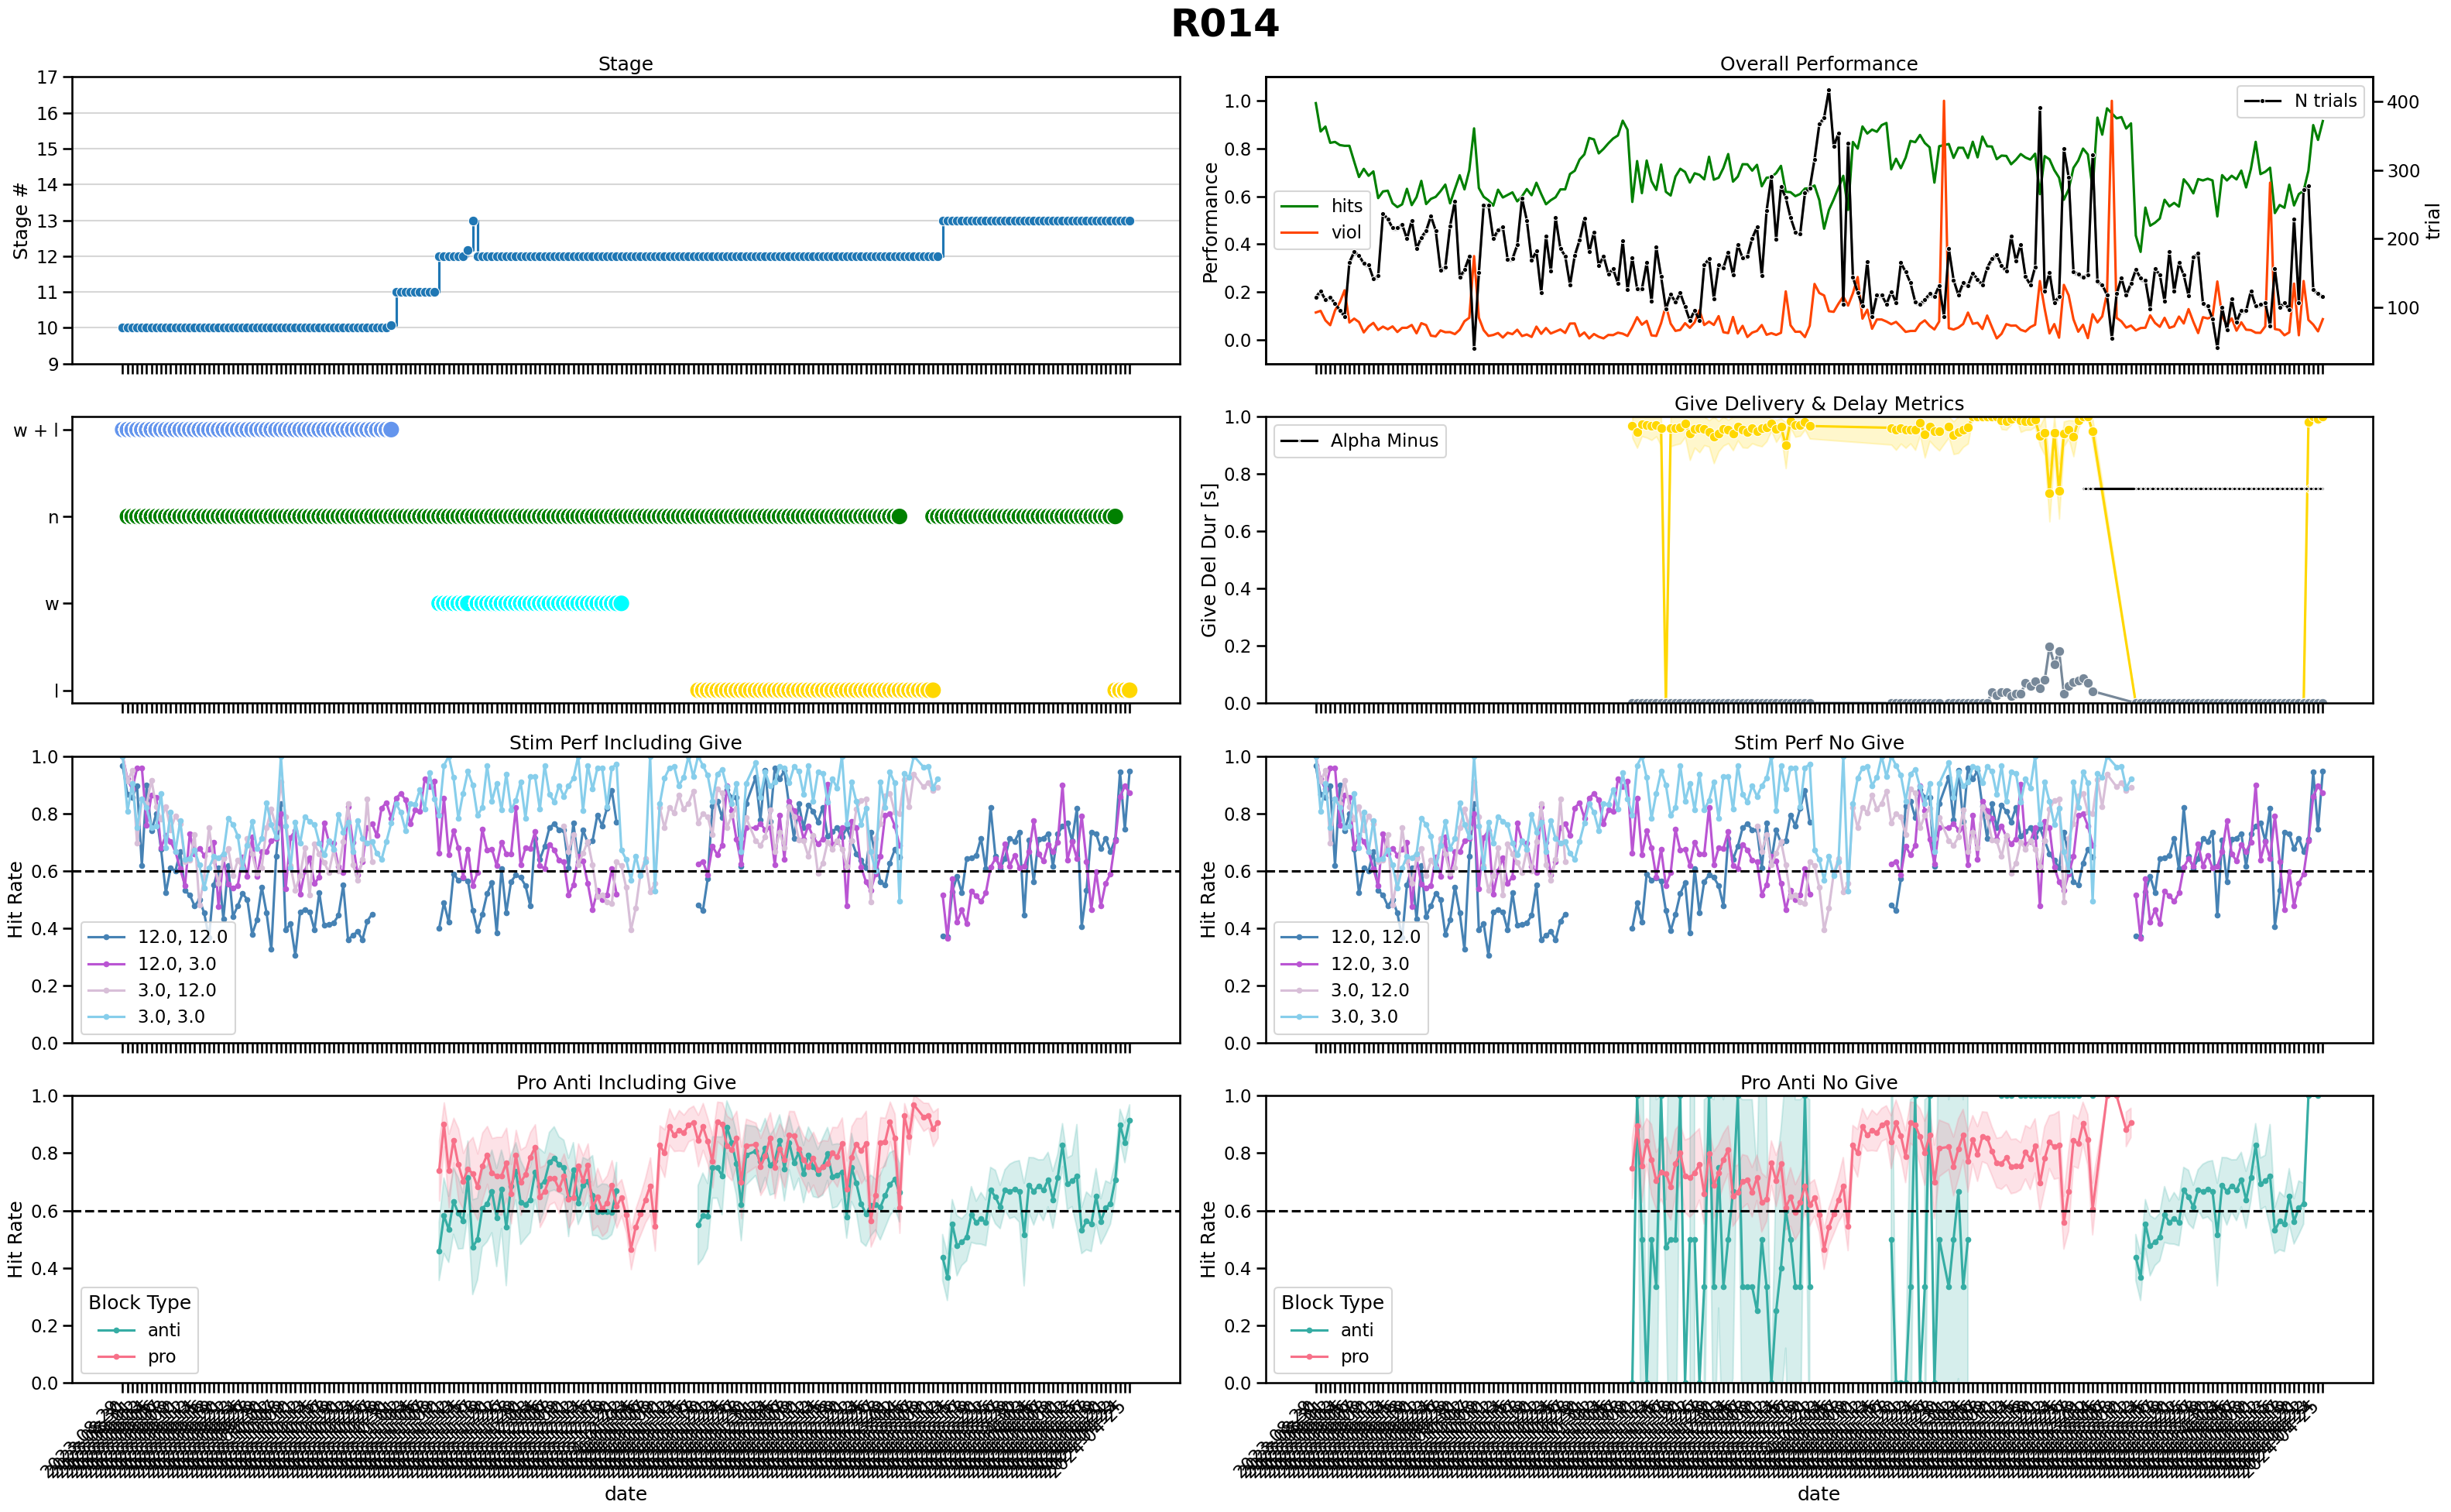

In [256]:
fig, axarr = plt.subplots(4, 2, figsize=(30, 17), sharex=True)
fig.suptitle(animal_id, fontsize=36, fontweight="bold")

df = trials_df.query("animal_id == @animal_id and stage > 9").copy()
plot_stage(
    df, ax=axarr[0, 0], group="date", aesthetics=False, ylim=(9, 17), title="Stage"
)

plot_perf_over_days_from_trials_df(df, ax=axarr[0, 1])

plot_give_info_days(df, ax=axarr[1, 0], aesthetics=False)
plot_give_use_rate_days(
    df,
    ax=axarr[1, 1],
    aesthetics=False,
)
plot_give_delay_dur_days_line(
    df, aesthetics=False, ax=axarr[1, 1], title="Give Delivery & Delay Metrics"
)

plot_performance_by_stim_over_days(
    df,
    without_give=False,
    ax=axarr[2, 0],
    aesthetics=False,
    confidence_intervals=False,
    title="Stim Perf Including Give",
)
plot_performance_by_stim_over_days(
    df,
    without_give=False,
    ax=axarr[2, 1],
    aesthetics=False,
    confidence_intervals=False,
    title="Stim Perf No Give",
)
plot_performance_by_pro_anti_over_days(
    df,
    without_give=False,
    ax=axarr[3, 0],
    confidence_intervals=False,
    xaxis_label=True,
    title="Pro Anti Including Give",
)

plot_performance_by_pro_anti_over_days(
    df,
    without_give=True,
    ax=axarr[3, 1],
    confidence_intervals=False,
    xaxis_label=True,
    title="Pro Anti No Give",
)

plt.tight_layout()

In [267]:
date_max

datetime.date(2024, 4, 13)

In [273]:
date_min

'2023-04-26'

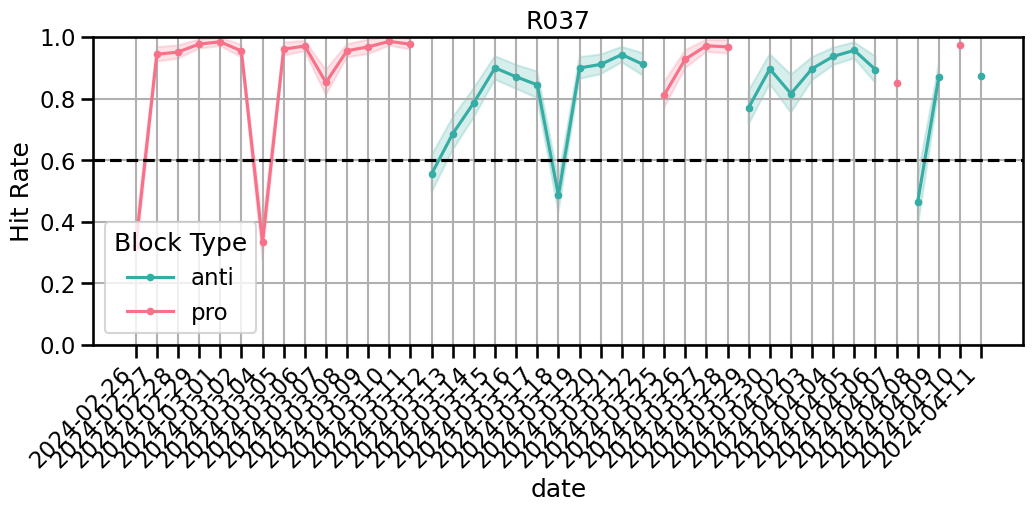

In [291]:
r037 = trials_df.query("animal_id == 'R037'").copy()
date_max = "2024-04-12"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    r037.query("date < @date_max"), ax=ax, without_give=True, title="R037"
)
ax.grid()

# ax.set(xlim=(None, "2024"))

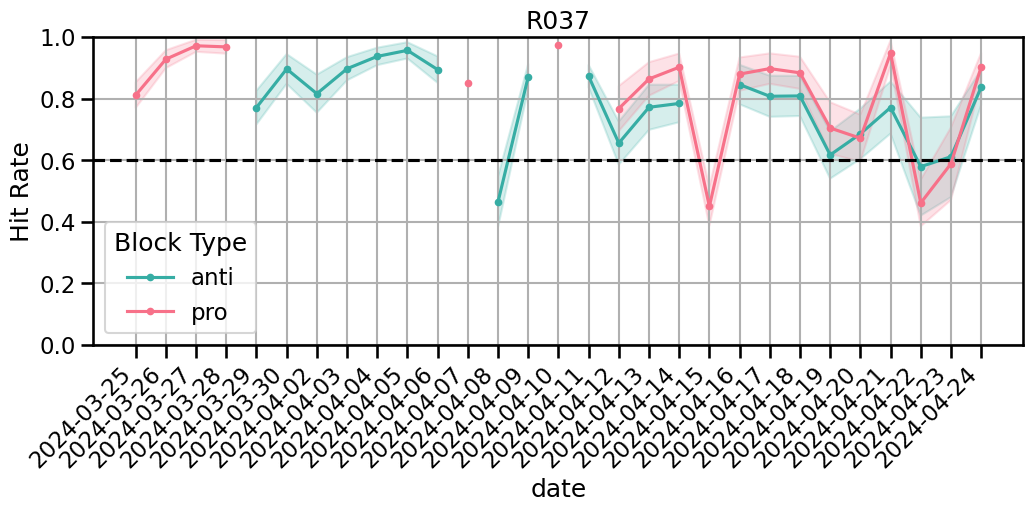

In [290]:
r037 = trials_df.query("animal_id == 'R037'").copy()
date_min = "2024-03-23"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    r037.query("date > @date_min"), ax=ax, without_give=True, title="R037"
)
ax.grid()

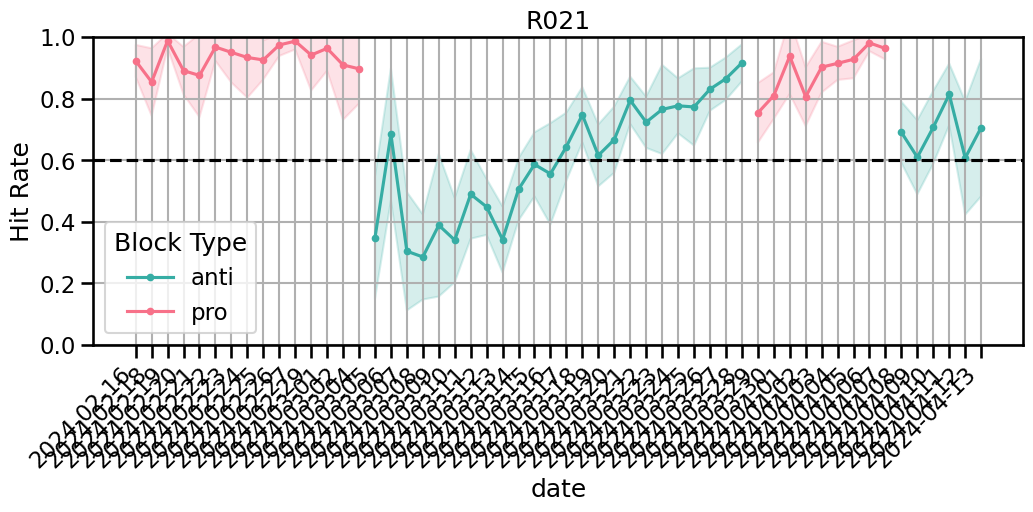

In [296]:
aid = "R021"
df = trials_df.query("animal_id == @aid").copy()
date_min = "2024-02-15"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    df.query("date > @date_min"), ax=ax, without_give=True, title=aid
)
ax.grid()

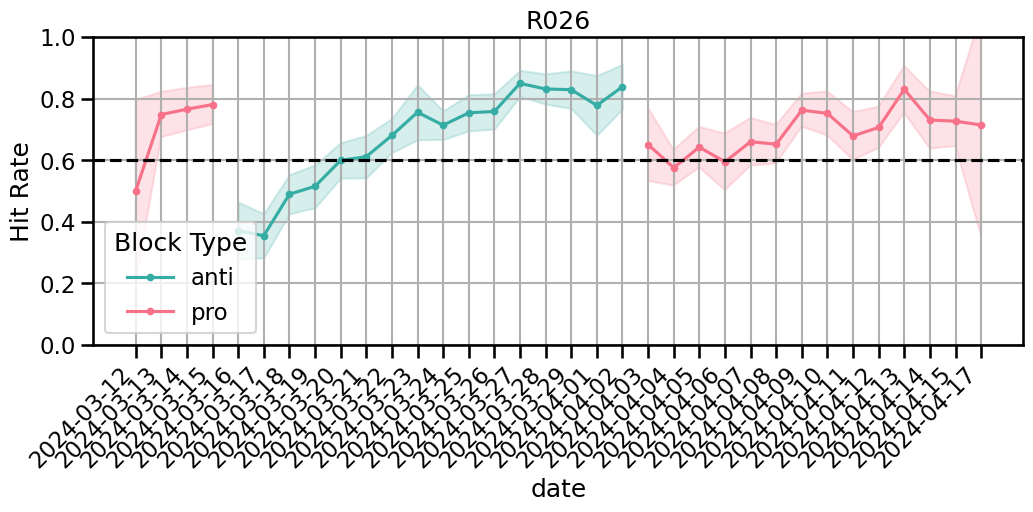

In [297]:
aid = "R026"
df = trials_df.query("animal_id == @aid").copy()
date_min = "2024-02-15"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    df.query("date > @date_min"), ax=ax, without_give=True, title=aid
)
ax.grid()

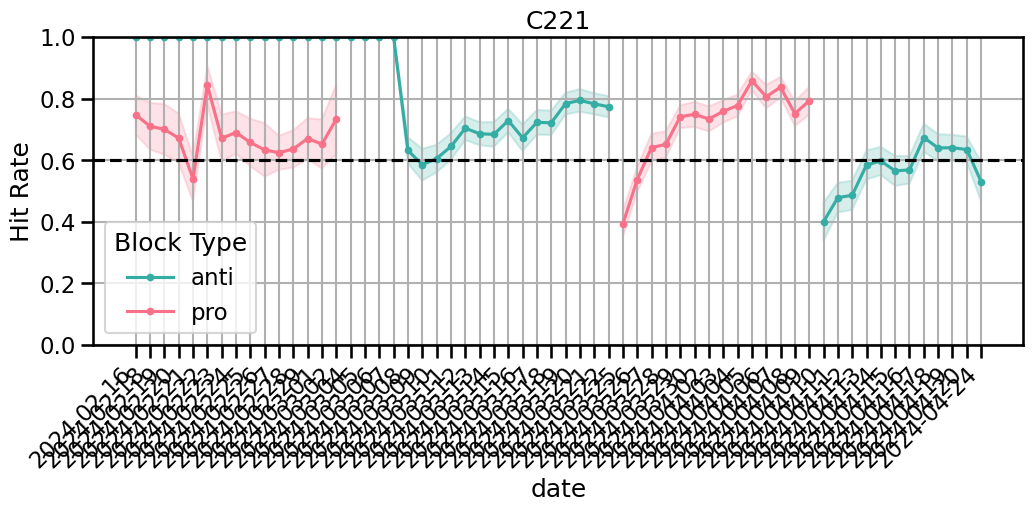

In [298]:
aid = "C221"
df = trials_df.query("animal_id == @aid").copy()
date_min = "2024-02-15"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    df.query("date > @date_min"), ax=ax, without_give=True, title=aid
)
ax.grid()

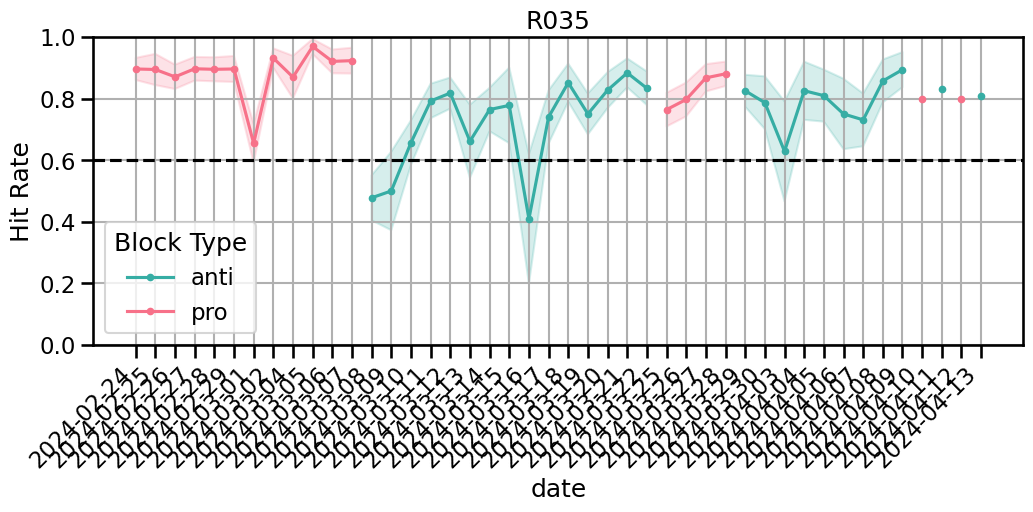

In [302]:
aid = "R035"
df = trials_df.query("animal_id == @aid").copy()
date_max = "2024-04-14"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    df.query("date < @date_max"), ax=ax, without_give=True, title=aid
)
ax.grid()

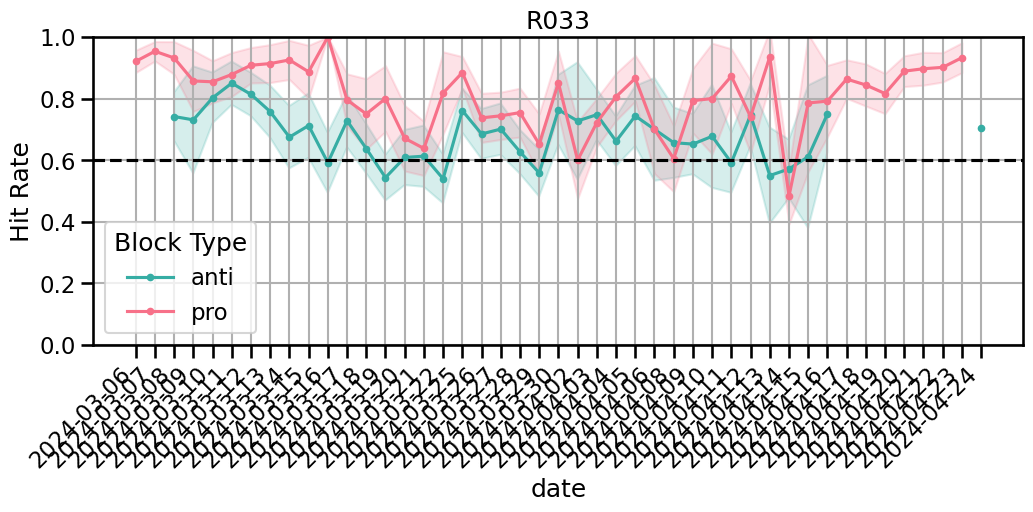

In [321]:
aid = "R033"
df = trials_df.query("animal_id == @aid").copy()
date_min = "2024-03-05"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    df.query("date > @date_min"), ax=ax, without_give=False, title=aid
)
# plot_give_info_days(df.query("date > @date_min"), ax=ax, aesthetics=False)
ax.grid()

### Anti Guided Animals

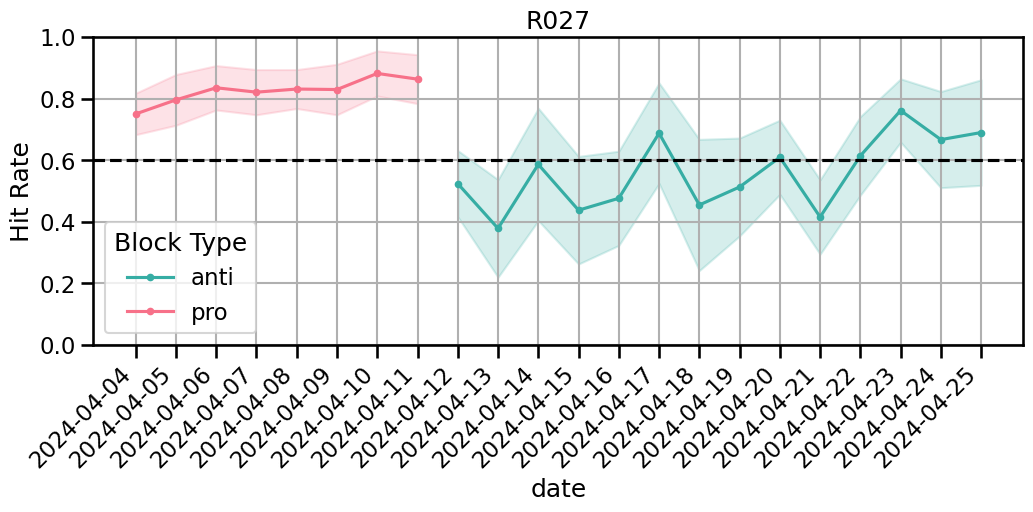

In [308]:
aid = "R027"
df = trials_df.query("animal_id == @aid").copy()
date_min = "2024-04-03"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    df.query("date > @date_min"), ax=ax, without_give=False, title=aid
)
# plot_give_info_days(df.query("date > @date_min"), ax=ax, aesthetics=False)
ax.grid()

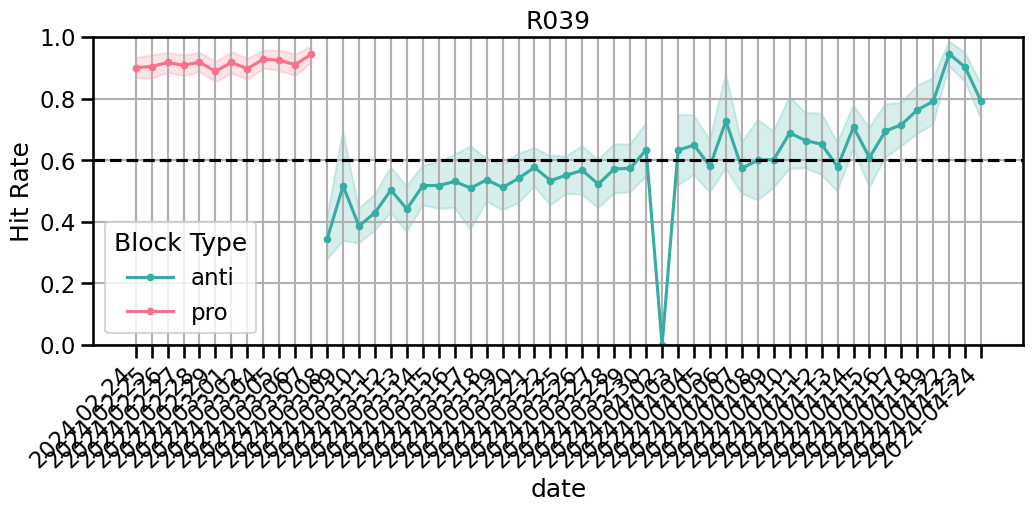

In [316]:
aid = "R039"
df = trials_df.query("animal_id == @aid").copy()
date_min = "2024-02-16"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    df.query("date > @date_min"), ax=ax, without_give=False, title=aid
)
# plot_give_info_days(df.query("date > @date_min"), ax=ax, aesthetics=False)
ax.grid()

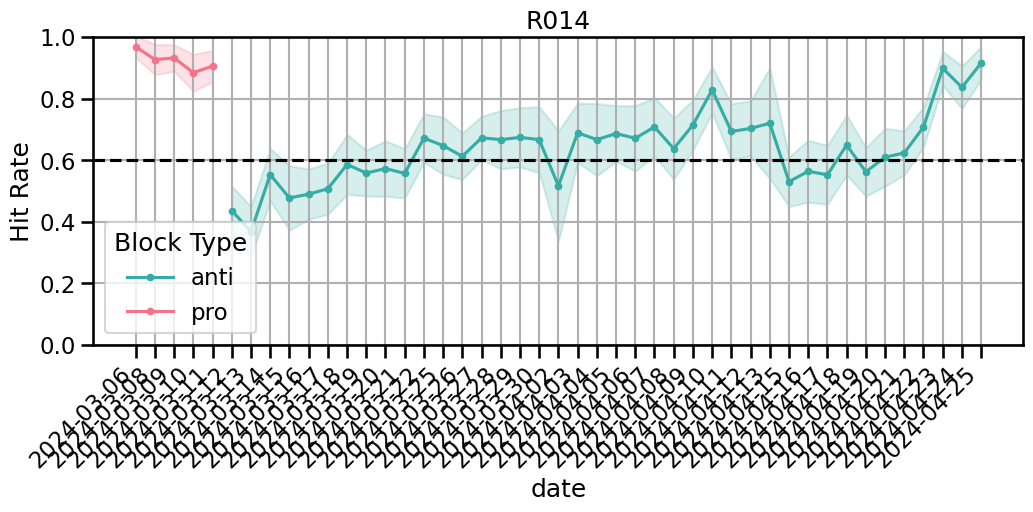

In [320]:
aid = "R014"
df = trials_df.query("animal_id == @aid").copy()
date_min = "2024-03-05"
fig, ax = plt.subplots(figsize=(12, 4))
plot_performance_by_pro_anti_over_days(
    df.query("date > @date_min"), ax=ax, without_give=False, title=aid
)
# plot_give_info_days(df.query("date > @date_min"), ax=ax, aesthetics=False)
ax.grid()